In [1]:
import glob,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

DATADIR = "C:\\Users\\Aaron\\Documents\\data\\planes\\"

CATEGORIES = ["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

img_array = []

for category in CATEGORIES:  # do all categories
    path = os.path.join(DATADIR,category)  # create path to each category
    for img in os.listdir(path):  # iterate over each image per each category
        img_array.append(cv2.imread(os.path.join(path,img)))  # convert to array
        
#,cv2.IMREAD_GRAYSCALE

In [2]:
path = 'C:\\Users\\Aaron\\Documents\\data\\planes\\'
files = [f for f in glob.glob(path + "*/*.jpeg", recursive=True)]
print(files[2])

C:\Users\Aaron\Documents\data\planes\drone\00000054.jpeg


In [3]:
len(img_array)

8530

In [4]:
training_data = []
IMG_SIZE = 100
def create_training_data():
    for category in CATEGORIES:  # do all 6 categories

        path = os.path.join(DATADIR,category)  # create path to all 6 classes
        class_num = CATEGORIES.index(category)  # get the classification number for each class

        for img in tqdm(os.listdir(path)):  # iterate over each image per category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                data_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([data_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
# Our dataset now has 8509 total samples

100%|██████████████████████████████████████████████████████████████████████████████| 1186/1186 [00:15<00:00, 75.37it/s]

8509


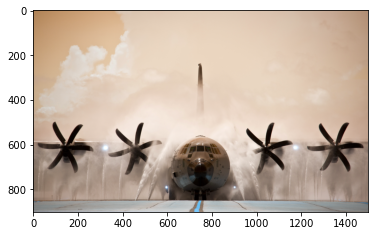

In [5]:
plt.imshow(img_array[1869], cmap='gray')  # graph it
plt.show()  # display!

In [6]:
import random
# shuffle our training data
random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])
# Just a quick peek on our shuffled data
# The reason we do this is so that our algorithm can properly learn the images, if they were sequential the 
# the model would get easily confused and have incorrect weights and might not reach optimality

0
3
4
5
1
1
0
0
1
1


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0][:].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [9]:
# Normalize the data
X = X/255.0

# Split the data into train, valid, and test sets into 70-20-10 split , X_valid, X_test 
X_train, y_train = X[0:5956], y[0:5956]
X_valid, y_valid = X[5956:7658], y[5956:7658]
X_test, y_test = X[7658:8510], y[7658:8510]

### Model 1

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(128, (3, 3), activation = 'relu',  input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(512))
model.add(layers.Dropout(0.4))

model.add(Dense(6))
model.add(Activation('relu'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               7373312   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [11]:
#model.fit(X, y, batch_size=32, epochs=1, validation_split=0.3)